# Importing libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Reading dataset

In [2]:
data = pd.read_csv('Meteorite_Landings.csv')
data.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   Class        45716 non-null  object 
 4   Mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   Latitude     38401 non-null  float64
 8   Longitude    38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


# Renaming columns
## For better understanding of data we'll rename some columns

In [26]:
data.rename(columns={'mass (g)':'Mass', 'recclass':'Class', 'reclat': 'Latitude', 'reclong': 'Longitude'}, inplace = True)

# Getting country from coordinate with geopy
## Once the dataset is filled only with latitude and longitude values, we can get  which country corresponds to each coordinate pair.
### Since this takes a bit longer than expected, we'll run it once,  add to the dataframe and save a new copy of it so we don't need to do it again.

from IPython.display import clear_output

geolocator = Nominatim(user_agent="MyApp")
coordinates = [coord for coord in data.GeoLocation]
country = []
for coordinate in coordinates:
    if pd.isna(coordinate) == False:
        clear_output(wait=True)
        print(len(country))
        coo = coordinate[1:-1]
        location = geolocator.reverse(coo)
        if location != None:
            address = location.raw['address']
            country.append(address.get('country', ''))
        else:
            country.append("")
    else:
        country.append("")
country

In [ ]:
items = ['year', 'Mass']
fig, axes = plt.subplots(1, 2)
for item , ax in zip(items, axes):
    ax = sns.histplot(data=data, x=item, ax=ax, kde=True)

<AxesSubplot:>

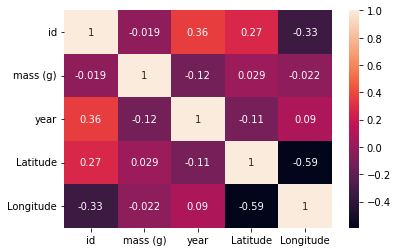

In [10]:
sns.heatmap(data.corr(), annot=True)

In [14]:
data.Class.value_counts().unique

<bound method Series.unique of L6         8285
H5         7142
L5         4796
H6         4528
H4         4211
           ... 
EL7           1
CH/CBb        1
H/L~4         1
LL3.7-6       1
L/LL          1
Name: Class, Length: 466, dtype: int64>

In [16]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
std = StandardScaler()